# Task
1. Select a dataset of your choice from Kaggle, or you can use one of the following:

    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()

    import seaborn as sns
    iris_df = sns.load_dataset('iris')

2. Follow the 7 steps for building a Machine Learning model to create your first ML project. Remember, programming is 80% about researching and learning—don’t hesitate to Google when needed!

3. Once completed, push your project to GitHub and take pride in your work!

4. Check if anyone in Slack needs help. If you can assist someone, that's another reason to feel proud of yourself! 😊

## 7 Steps of building a Machine Learning model
1. Understand the Data: Inspect, explore, and understand the features.
2. Handle Missing Data: Drop or impute missing values.
3. Feature Engineering: Transform, create, or encode new features.
4. Handle Outliers: Detect and handle extreme values.
5. Split Data: Create training and testing datasets.
6. Train the Model: Fit the model to the training data.
7. Evaluate the Model: Test the model and evaluate its performance.

# lets go !!!

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

In [22]:
df = sns.load_dataset('iris')

Step 1: Understanding the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
print("Number of lines", len(df))
print("Observations with Not A Number ")
for column in df.columns:
    
    print(column,": ",df[column].isna().sum())  

Number of lines 150
Observations with Not A Number 
sepal_length :  0
sepal_width :  0
petal_length :  0
petal_width :  0
species :  0


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [19]:
species_count = df['species'].nunique()
species_list = df['species'].unique().tolist()


print(f"Number of unique species: {species_count}")
print(f"List of species: {species_list}")

Number of unique species: 3
List of species: ['setosa', 'versicolor', 'virginica']


<Figure size 400x300 with 0 Axes>

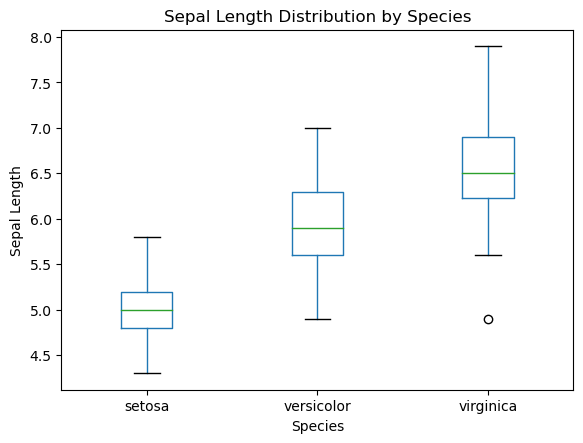

In [29]:
plt.figure(figsize=(4,3))
df.boxplot(column='sepal_length', by='species', grid=False)
plt.title('Sepal Length Distribution by Species')
plt.suptitle('')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()


<Figure size 400x300 with 0 Axes>

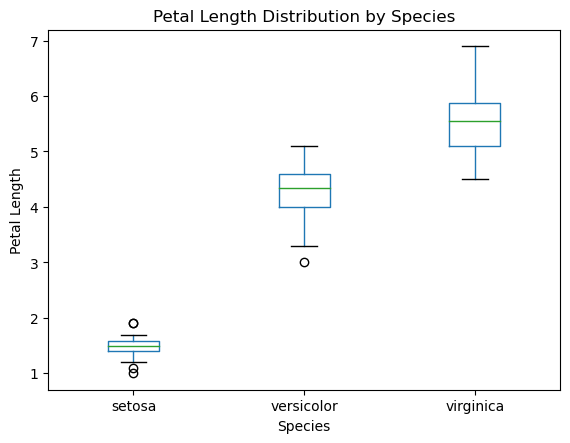

In [30]:
plt.figure(figsize=(4,3))
df.boxplot(column='petal_length', by='species', grid=False)
plt.title('Petal Length Distribution by Species')
plt.suptitle('')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()


In [33]:
skewness = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].skew()
print(skewness)


sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64


Step 2: Handling Missing Data
(Doesn't seem necessary for iris)

In [ ]:
# df['value'] = df.groupby('species')['value'].transform(lambda x: x.fillna(x.median()))
# Fill missing value with the median value of species


Step 3: Feature Engineering

In [69]:

df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']

df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
df['petal_ratio'] = df['petal_length'] / df['petal_width']


Step 4: Identify and Handle Outliers

In [66]:

# Define a function to calculate outliers within each species
def find_outliers_by_species(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (group < lower_bound) | (group > upper_bound)

outliers = df.groupby('species').apply(lambda x: find_outliers_by_species(x[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])).reset_index(level=0, drop=True)
df_filtered = df[~outliers.any(axis=1)] # Filter out the outliers
print(df_filtered.shape)

(137, 7)


Step 5: Split Data

In [71]:
from sklearn.model_selection import train_test_split

X = df_filtered[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area']]
y = df_filtered['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Step 6: Train

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Step 7: Evaluate

In [83]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_model = model.predict(X_test)
accuracy_model = accuracy_score(y_test, y_pred_model)
print(f'Logistic Regression Accuracy: {accuracy_model:.2f}')

print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_model))

Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.86      0.92        14
   virginica       0.88      1.00      0.93        14

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42

